# Target Analysis


In [1]:
import sys
sys.path.append('./backend/')

import nrrd
import utils
import ioutil

import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='whitegrid')
#plt.rcParams['axes.linewidth'] = 1
#plt.rcParams['axes.edgecolor'] = 'black'

In [2]:
# Globals
FONTSIZE = 18

## Disease-Free Survival

In [3]:
dfs = pd.read_csv('./../../data/to_analysis/target_dfs.csv', index_col=0)
dfs.head()

,dfs
ID,
2,0
4,0
5,0
8,0
10,0


In [4]:
dfs_size = dfs.size
dfs_size

198

In [5]:
# The number of patients with relapse.
dfs.sum()

dfs    64
dtype: int64

In [6]:
# Majority is surviving.
dfs_size - dfs.sum()

dfs    134
dtype: int64

## Locoregional Relapse

In [7]:
lrr = pd.read_csv('./../../data/to_analysis/target_lrr.csv', index_col=0)
lrr.head()

,lrr
ID,
2,0
4,0
5,0
8,0
10,0


In [8]:
lrr_size = lrr.size
lrr_size

198

In [9]:
# The number of patients with relapse.
lrr.sum()

lrr    49
dtype: int64

In [10]:
# Majority is without relapse.
lrr_size - lrr.sum()

lrr    149
dtype: int64

In [11]:
fractions = [
    float(dfs.sum() / dfs_size),
    float(1 - (dfs.sum() / dfs_size)),
    float(1 - (lrr.sum() / lrr_size)),
    float(lrr.sum() / lrr_size),
]
fractions

[0.32323232323232326,
 0.6767676767676767,
 0.7525252525252525,
 0.2474747474747475]

In [12]:
# NOTE: Switch DFS labels to match xticks in plot.
temp = dfs.replace(1, 2)
temp = temp.replace(0, 1)
dfs_rev = temp.replace(2, 0)

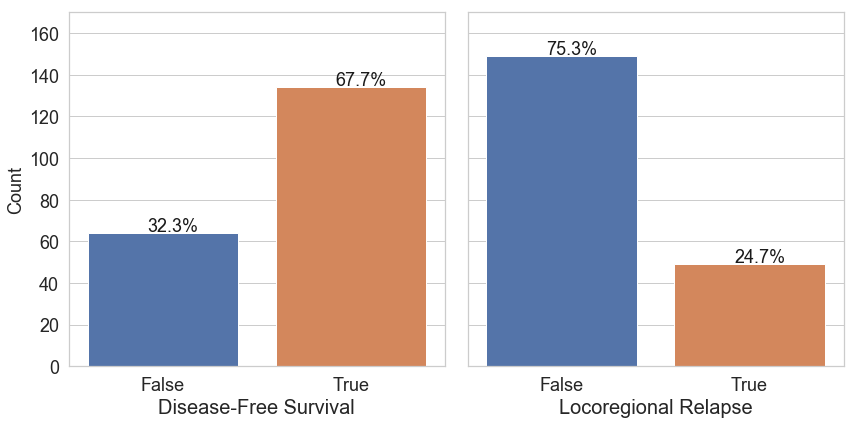

In [13]:
titles = [
    'Disease-Free Survival', 
    'Locoregional Relapse'
]
fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, sharex=True);
sns.countplot(
    x='dfs', data=dfs_rev, ax=axes[0], saturation=0.85
);
axes[0].set_ylabel('Count', fontsize=FONTSIZE)
axes[0].set_xticklabels(['True', 'False',])

sns.countplot(
    x='lrr', data=lrr, ax=axes[1], saturation=0.85,
);
axes[1].set_ylabel('')
axes[1].set_xticklabels(['False', 'True'])

count = 0
for num, axis in enumerate(axes):
    axis.set_xlabel(titles[num], fontsize=FONTSIZE + 2)
    axis.tick_params(labelsize=FONTSIZE)
    axis.set_ylim([0, 170])
    for patch in axis.patches:
        axis.annotate(
            '{:.1f}%'.format(fractions[count] * 100),
            (patch.get_x() + patch.get_width() / 2.5, patch.get_height() + 1), 
            color='k', fontsize=FONTSIZE
        )
        count = count + 1

plt.tight_layout()
plt.savefig(
    './figures/targets.png', 
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

**NOTES:**
* Should use different metrics (or switch labels) for DFS and LRR. 
* Events of not suriving/relapse is denoted as 1.